https://www.cdc.gov/brfss/brfssprevalence/index.html

https://www.cdc.gov/brfss/questionnaires/pdf-ques/2021-BRFSS-Questionnaire-1-19-2022-508.pdf

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4580372/

https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system

https://www.cdc.gov/pcd/issues/2019/19_0109.htm

https://medium.com/@alexteboul17/building-predictive-models-for-heart-disease-using-the-2015-behavioral-risk-factor-surveillance-b786368021ab

https://github.com/topics/brfss-dataset

https://openworks.wooster.edu/independentstudy/9436/

https://www.youtube.com/watch?v=VVY5k4_AAUg

https://easychair.org/publications/preprint_open/zXfg

https://digital.library.txstate.edu/bitstream/handle/10877/8132/GRITSENKO-THESIS-2019.pdf?isAllowed=y&sequence=1

https://www.cdc.gov/brfss/annual_data/2021/pdf/2021-calculated-variables-version4-508.pdf

https://github.com/Machine-Learning-Projects1/2020-BRFSS-Codebook-CDC/blob/main/CDC_ML.ipynb

###Loading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

raw_data = pd.read_sas('/content/drive/MyDrive/DM Project/Data/LLCP2021.XPT')
raw_data.shape

/usr/local/lib/python3.8/dist-packages/pandas/io/sas/sas_xport.py:475: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x] = v


(438693, 303)

In [ ]:
%matplotlib inline
import csv
import numpy as np
import scipy.stats as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [ ]:
#Selecting columns required. Source: https://www.cdc.gov/brfss/annual_data/2021/pdf/2021-calculated-variables-version4-508.pdf
data = raw_data[['_RFHLTH', '_PHYS14D', '_MENT14D', '_TOTINDA', '_RFHYPE6', '_RFCHOL3', '_SEX', '_AGE_G', '_BMI5CAT', '_SMOKER3', '_RFDRHV7', '_MICHD']]
data.head()

,_RFHLTH,_PHYS14D,_MENT14D,_TOTINDA,_RFHYPE6,_RFCHOL3,_SEX,_AGE_G,_BMI5CAT,_SMOKER3,_RFDRHV7,_MICHD
0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,6.0,1.0,3.0,1.0,2.0
1,1.0,1.0,1.0,1.0,2.0,2.0,2.0,6.0,NaN,4.0,1.0,1.0
2,1.0,1.0,1.0,2.0,2.0,1.0,2.0,6.0,3.0,4.0,1.0,1.0
3,1.0,1.0,2.0,1.0,2.0,2.0,2.0,5.0,4.0,4.0,1.0,2.0
4,2.0,3.0,1.0,1.0,1.0,2.0,1.0,6.0,3.0,4.0,1.0,1.0


In [ ]:
#data.info()

In [ ]:
#data.describe()

In [ ]:
data.isnull().sum()

_RFHLTH         0
_PHYS14D        0
_MENT14D        0
_TOTINDA        0
_RFHYPE6        0
_RFCHOL3    61151
_SEX            0
_AGE_G          0
_BMI5CAT    46852
_SMOKER3        0
_RFDRHV7        0
_MICHD       4635
dtype: int64

### Data Visualization

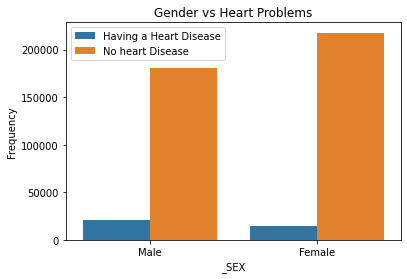

In [ ]:
# Gender vs Heart Problems
import seaborn as sns

ax = sns.countplot(x="_SEX", hue="_MICHD", data=data)
ax.set_title("Gender vs Heart Problems")
ax.set_ylabel("Frequency")
labels_hd = ["Having a Heart Disease","No heart Disease"]
ax.legend(labels=labels_hd)
num = np.arange(2)
labels=["Male","Female"]
plt.xticks(num, labels)
plt.show()


In [ ]:
gender_ct = pd.crosstab(data['_MICHD'], data['_SEX'])
print (gender_ct)

print("-----column percentages-----")
colsum=gender_ct.sum(axis=0)
colpct=gender_ct/colsum
print(colpct)

import scipy.stats as sp

print("-----Chi-square calculations-----")
print ('Chi-square value, p value, Degrees of freedom, Expected counts/frequencies')
cs1= sp.chi2_contingency(gender_ct)
print (cs1)

_SEX       1.0     2.0
_MICHD                
1.0      20542   14781
2.0     180918  217817
-----column percentages-----
_SEX         1.0       2.0
_MICHD                    
1.0     0.101966  0.063547
2.0     0.898034  0.936453
-----Chi-square calculations-----
Chi-square value, p value, Degrees of freedom, Expected counts/frequencies
(2130.9384459261464, 0.0, 1, array([[ 16394.51773726,  18928.48226274],
       [185065.48226274, 213669.51773726]]))


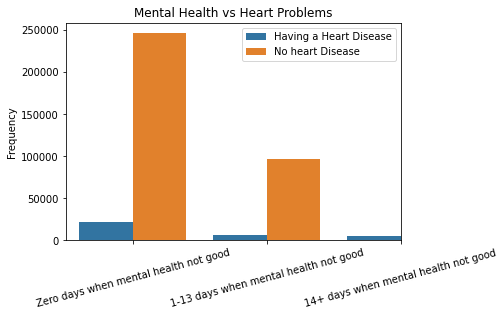

In [ ]:
# Mental Health vs Heart Problems

ax = sns.countplot(x="_MENT14D", hue="_MICHD", data=data)
ax.set_title("Mental Health vs Heart Problems")
ax.set_ylabel("Frequency")
labels_hd = ["Having a Heart Disease","No heart Disease"]
ax.legend(labels=labels_hd)
num = np.arange(3)
labels=["Zero days when mental health not good","1-13 days when mental health not good","14+ days when mental health not good"]
df.plot(kind='bar',alpha=0.75, rot=15)
plt.xlabel("")
plt.xticks(num, labels)
plt.show()


In [ ]:
mh_ct = pd.crosstab(data['_MICHD'], data['_MENT14D'])
print (gender_ct)

print("-----column percentages-----")
colsum=mh_ct.sum(axis=0)
colpct=mh_ct/colsum
print(colpct)

import scipy.stats as sp

print("-----Chi-square calculations-----")
print ('Chi-square value, p value, Degrees of freedom, Expected counts/frequencies')
cs2= sp.chi2_contingency(mh_ct)
print (cs2)

_SEX       1.0     2.0
_MICHD                
1.0      20542   14781
2.0     180918  217817
-----column percentages-----
_MENT14D       1.0       2.0       3.0       9.0
_MICHD                                          
1.0       0.082867  0.063367  0.103478  0.115719
2.0       0.917133  0.936633  0.896522  0.884281
-----Chi-square calculations-----
Chi-square value, p value, Degrees of freedom, Expected counts/frequencies
(932.6970835928756, 7.156108414183e-202, 3, array([[ 21851.19200429,   8422.10773445,   4431.54898193,
           618.15127932],
       [246661.80799571,  95070.89226555,  50024.45101807,
          6977.84872068]]))


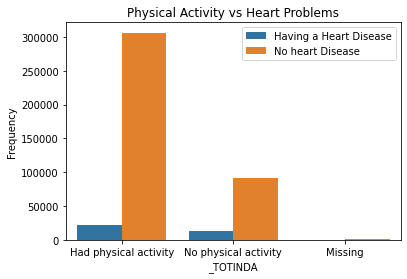

In [ ]:
# Physical Activity vs Heart Problems

ax = sns.countplot(x="_TOTINDA", hue="_MICHD", data=data)
ax.set_title("Physical Activity vs Heart Problems")
ax.set_ylabel("Frequency")
labels_hd = ["Having a Heart Disease","No heart Disease"]
ax.legend(labels=labels_hd)
num = np.arange(3)
labels=["Had physical activity","No physical activity", "Missing"]
plt.xticks(num, labels)
plt.show()

In [ ]:
phyact_ct = pd.crosstab(data['_MICHD'], data['_TOTINDA'])
print (phyact_ct)
print("-----column percentages-----")

colsum=phyact_ct.sum(axis=0)
colpct=phyact_ct/colsum
print(colpct)

import scipy.stats as sp

print("-----Chi-square calculations-----")
print ('Chi-square value, p value, Degrees of freedom, Expected counts/frequencies')
cs3= sp.chi2_contingency(phyact_ct)
print (cs3)

_TOTINDA     1.0    2.0  9.0
_MICHD                      
1.0        21823  13387  113
2.0       306250  91795  690
-----column percentages-----
_TOTINDA       1.0       2.0       9.0
_MICHD                                
1.0       0.066519  0.127275  0.140722
2.0       0.933481  0.872725  0.859278
-----Chi-square calculations-----
Chi-square value, p value, Degrees of freedom, Expected counts/frequencies
(3970.670820278661, 0.0, 2, array([[2.66980970e+04, 8.55955606e+03, 6.53469559e+01],
       [3.01374903e+05, 9.66224439e+04, 7.37653044e+02]]))


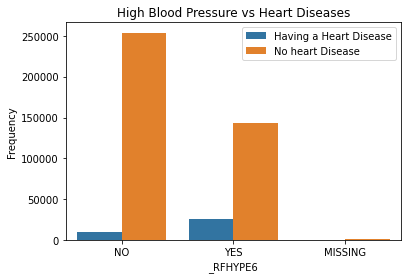

In [ ]:
# High Blood Pressure vs Heart Problems

ax = sns.countplot(x="_RFHYPE6", hue="_MICHD", data=data)
ax.set_title("High Blood Pressure vs Heart Diseases")
ax.set_ylabel("Frequency")
labels_hd = ["Having a Heart Disease","No heart Disease"]
ax.legend(labels=labels_hd)
num = np.arange(3)
labels=["NO","YES", "MISSING"]
plt.xticks(num, labels)
plt.show()

In [ ]:
bp_ct = pd.crosstab(data['_MICHD'], data['_RFHYPE6'])
print (bp_ct)
print("-----column percentages-----")

colsum=bp_ct.sum(axis=0)
colpct=bp_ct/colsum
print(colpct)

import scipy.stats as sp

print("-----Chi-square calculations-----")
print ('Chi-square value, p value, Degrees of freedom, Expected counts/frequencies')
cs4= sp.chi2_contingency(bp_ct)
print (cs4)

_RFHYPE6     1.0     2.0   9.0
_MICHD                        
1.0         9164   26020   139
2.0       253829  143416  1490
-----column percentages-----
_RFHYPE6       1.0       2.0       9.0
_MICHD                                
1.0       0.034845  0.153568  0.085328
2.0       0.965155  0.846432  0.914672
-----Chi-square calculations-----
Chi-square value, p value, Degrees of freedom, Expected counts/frequencies
(19429.786242682047, 0.0, 2, array([[2.14019825e+04, 1.37884518e+04, 1.32565618e+02],
       [2.41591017e+05, 1.55647548e+05, 1.49643438e+03]]))


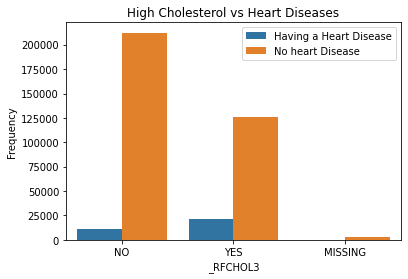

In [ ]:
# High Cholesterol vs Heart Diseases

ax = sns.countplot(x="_RFCHOL3", hue="_MICHD", data=data)
ax.set_title("High Cholesterol vs Heart Diseases")
ax.set_ylabel("Frequency")
labels_hd = ["Having a Heart Disease","No heart Disease"]
ax.legend(labels=labels_hd)
num = np.arange(3)
labels=["NO","YES", "MISSING"]
plt.xticks(num, labels)
plt.show()

In [ ]:
chol_ct = pd.crosstab(data['_MICHD'], data['_RFCHOL3'])
print (chol_ct)
print("-----column percentages-----")

colsum=chol_ct.sum(axis=0)
colpct=chol_ct/colsum
print(colpct)

import scipy.stats as sp

print("-----Chi-square calculations-----")
print ('Chi-square value, p value, Degrees of freedom, Expected counts/frequencies')
cs6= sp.chi2_contingency(chol_ct)
print (cs6)

_RFCHOL3     1.0     2.0   9.0
_MICHD                        
1.0        10947   21903   306
2.0       212191  125883  2654
-----column percentages-----
_RFCHOL3       1.0       2.0       9.0
_MICHD                                
1.0       0.049059  0.148208  0.103378
2.0       0.950941  0.851792  0.896622
-----Chi-square calculations-----
Chi-square value, p value, Degrees of freedom, Expected counts/frequencies
(10822.20401552232, 0.0, 2, array([[ 19787.85807363,  13105.64938858,    262.49253779],
       [203350.14192637, 134680.35061142,   2697.50746221]]))


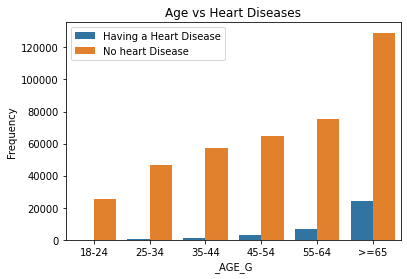

In [ ]:
# Age vs Heart Diseases

ax = sns.countplot(x="_AGE_G", hue="_MICHD", data=data)
ax.set_title("Age vs Heart Diseases")
ax.set_ylabel("Frequency")
labels_hd = ["Having a Heart Disease","No heart Disease"]
ax.legend(labels=labels_hd)
num = np.arange(6)
labels=["18-24","25-34","35-44","45-54","55-64",">=65"]
plt.xticks(num, labels)
plt.show()

In [ ]:
age_ct = pd.crosstab(data['_MICHD'], data['_AGE_G'])
print (age_ct)
print("-----column percentages-----")

colsum=age_ct.sum(axis=0)
colpct=age_ct/colsum
print(colpct)

import scipy.stats as sp

print("-----Chi-square calculations-----")
print ('Chi-square value, p value, Degrees of freedom, Expected counts/frequencies')
cs7= sp.chi2_contingency(age_ct)
print (cs7)

_AGE_G    1.0    2.0    3.0    4.0    5.0     6.0
_MICHD                                           
1.0       150    461   1068   2826   6817   24001
2.0     25732  46713  57339  64524  75341  129086
-----column percentages-----
_AGE_G       1.0       2.0       3.0      4.0       5.0      6.0
_MICHD                                                          
1.0     0.005796  0.009772  0.018285  0.04196  0.082974  0.15678
2.0     0.994204  0.990228  0.981715  0.95804  0.917026  0.84322
-----Chi-square calculations-----
Chi-square value, p value, Degrees of freedom, Expected counts/frequencies
(21369.021168582014, 0.0, 5, array([[  2106.23899571,   3838.9505596 ,   4753.07553599,
          5480.84368909,   6685.89689396,  12457.99432564],
       [ 23775.76100429,  43335.0494404 ,  53653.92446401,
         61869.15631091,  75472.10310604, 140629.00567436]]))


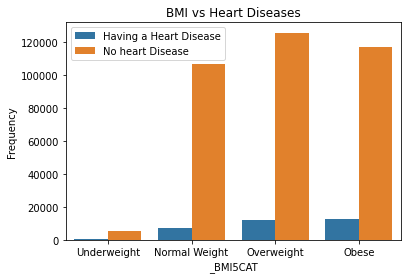

In [ ]:
# BMI vs Heart Diseases

ax = sns.countplot(x="_BMI5CAT", hue="_MICHD", data=data)
ax.set_title("BMI vs Heart Diseases")
ax.set_ylabel("Frequency")
labels_hd = ["Having a Heart Disease","No heart Disease"]
ax.legend(labels=labels_hd)
num = np.arange(4)
labels=["Underweight","Normal Weight","Overweight","Obese"]
plt.xticks(num, labels)
plt.show()

In [ ]:
bmi_ct = pd.crosstab(data['_MICHD'], data['_BMI5CAT'])
print (bmi_ct)
print("-----column percentages-----")

colsum=bmi_ct.sum(axis=0)
colpct=bmi_ct/colsum
print(colpct)

import scipy.stats as sp

print("-----Chi-square calculations-----")
print ('Chi-square value, p value, Degrees of freedom, Expected counts/frequencies')
cs8= sp.chi2_contingency(bmi_ct)
print (cs8)

_BMI5CAT   1.0     2.0     3.0     4.0
_MICHD                                
1.0        510    7458   11848   12837
2.0       5680  107017  125694  116980
-----column percentages-----
_BMI5CAT       1.0      2.0       3.0       4.0
_MICHD                                         
1.0       0.082391  0.06515  0.086141  0.098885
2.0       0.917609  0.93485  0.913859  0.901115
-----Chi-square calculations-----
Chi-square value, p value, Degrees of freedom, Expected counts/frequencies
(909.2828798146065, 8.580207878636096e-197, 3, array([[   520.90094943,   9633.30148393,  11574.43592664,
         10924.36164   ],
       [  5669.09905057, 104841.69851607, 125967.56407336,
        118892.63836   ]]))


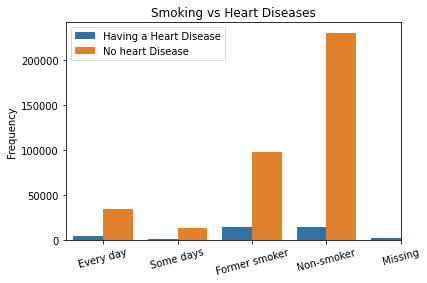

In [ ]:
# Smoking vs Heart Diseases

ax = sns.countplot(x="_SMOKER3", hue="_MICHD", data=data)
ax.set_title("Smoking vs Heart Diseases")
ax.set_ylabel("Frequency")
labels_hd = ["Having a Heart Disease","No heart Disease"]
ax.legend(labels=labels_hd)
num = np.arange(5)
labels=["Every day","Some days","Former smoker","Non-smoker", "Missing"]
df.plot(kind='bar',alpha=0.75, rot=15)
plt.xlabel("")
plt.xticks(num, labels)
plt.show()

In [ ]:
smoker_ct = pd.crosstab(data['_MICHD'], data['_SMOKER3'])
print (smoker_ct)
print("-----column percentages-----")

colsum=smoker_ct.sum(axis=0)
colpct=smoker_ct/colsum
print(colpct)

import scipy.stats as sp

print("-----Chi-square calculations-----")
print ('Chi-square value, p value, Degrees of freedom, Expected counts/frequencies')
cs9= sp.chi2_contingency(smoker_ct)
print (cs9)

_SMOKER3    1.0    2.0    3.0     4.0    9.0
_MICHD                                      
1.0        4116   1376  14047   14077   1707
2.0       34324  13368  97895  230358  22790
-----column percentages-----
_SMOKER3       1.0       2.0       3.0      4.0       9.0
_MICHD                                                   
1.0       0.107076  0.093326  0.125485  0.05759  0.069682
2.0       0.892924  0.906674  0.874515  0.94241  0.930318
-----Chi-square calculations-----
Chi-square value, p value, Degrees of freedom, Expected counts/frequencies
(5175.917390936478, 0.0, 4, array([[  3128.19051832,   1199.84497924,   9109.67489598,
         19891.7598685 ,   1993.52973796],
       [ 35311.80948168,  13544.15502076, 102832.32510402,
        224543.2401315 ,  22503.47026204]]))


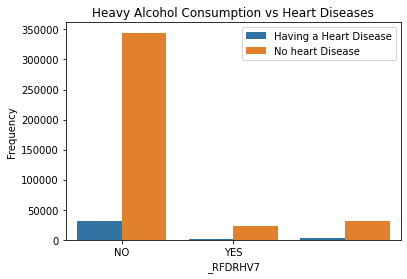

In [ ]:
# Heavy Alcohol Consumption vs Heart Diseases

ax = sns.countplot(x="_RFDRHV7", hue="_MICHD", data=data)
ax.set_title("Heavy Alcohol Consumption vs Heart Diseases")
ax.set_ylabel("Frequency")
labels_hd = ["Having a Heart Disease","No heart Disease"]
ax.legend(labels=labels_hd)
num = np.arange(2)
labels=["NO","YES"]
plt.xticks(num, labels)
plt.show()

In [ ]:
drinker_ct = pd.crosstab(data['_MICHD'], data['_RFDRHV7'])
print (drinker_ct)
print("-----column percentages-----")

colsum=drinker_ct.sum(axis=0)
colpct=drinker_ct/colsum
print(colpct)

import scipy.stats as sp

print("-----Chi-square calculations-----")
print ('Chi-square value, p value, Degrees of freedom, Expected counts/frequencies')
cs10= sp.chi2_contingency(drinker_ct)
print (cs10)

_RFDRHV7     1.0    2.0    9.0
_MICHD                        
1.0        31728   1243   2352
2.0       344252  22449  32034
-----column percentages-----
_RFDRHV7       1.0       2.0     9.0
_MICHD                              
1.0       0.084387  0.052465  0.0684
2.0       0.915613  0.947535  0.9316
-----Chi-square calculations-----
Chi-square value, p value, Degrees of freedom, Expected counts/frequencies
(387.96187595537396, 5.690481842025233e-85, 2, array([[ 30596.69799888,   1928.02002497,   2798.28197614],
       [345383.30200112,  21763.97997503,  31587.71802386]]))


###Pre-processing

In [ ]:
data.dropna(inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
6 in data.iloc[0][:].tolist()

True

In [ ]:
#Value 9 in these columns represents "Don't know/ Refused/ Missing" values
drop_rows = []
for i in range(0, data.shape[0]):
  if 9 in data.iloc[i][:].tolist():
    drop_rows.append(i)

print(data.shape)
data.drop(data.index[drop_rows], axis=0, inplace = True)

(335481, 12)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
data.head(10)

,_RFHLTH,_PHYS14D,_MENT14D,_TOTINDA,_RFHYPE6,_RFCHOL3,_SEX,_AGE_G,_BMI5CAT,_SMOKER3,_RFDRHV7,_MICHD
0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,6.0,1.0,3.0,1.0,2.0
2,1.0,1.0,1.0,2.0,2.0,1.0,2.0,6.0,3.0,4.0,1.0,1.0
3,1.0,1.0,2.0,1.0,2.0,2.0,2.0,5.0,4.0,4.0,1.0,2.0
4,2.0,3.0,1.0,1.0,1.0,2.0,1.0,6.0,3.0,4.0,1.0,1.0
5,1.0,1.0,1.0,2.0,1.0,1.0,1.0,6.0,2.0,3.0,1.0,2.0
6,1.0,3.0,1.0,2.0,2.0,1.0,1.0,5.0,4.0,4.0,1.0,2.0
7,2.0,1.0,1.0,1.0,2.0,2.0,1.0,5.0,2.0,3.0,1.0,1.0
9,1.0,3.0,2.0,1.0,2.0,1.0,2.0,6.0,4.0,3.0,1.0,2.0
10,2.0,1.0,3.0,2.0,2.0,2.0,2.0,6.0,3.0,2.0,1.0,2.0
11,1.0,2.0,3.0,2.0,2.0,2.0,2.0,6.0,4.0,4.0,1.0,2.0


In [ ]:
data.shape

(307222, 12)

In [ ]:
#datavizs
import matplotlib.pyplot as plt

In [ ]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]
print(X.shape, y.shape)

(307222, 11) (307222,)


In [ ]:
y = y.replace(2.0, 0).astype(int)

In [ ]:
#encoding
from sklearn.preprocessing import OneHotEncoder

oh_en = OneHotEncoder(handle_unknown='ignore', sparse=False)
X = oh_en.fit_transform(X)
print(X.shape)

(307222, 32)


In [ ]:
oh_en.categories_

[array([1., 2.]),
 array([1., 2., 3.]),
 array([1., 2., 3.]),
 array([1., 2.]),
 array([1., 2.]),
 array([1., 2.]),
 array([1., 2.]),
 array([1., 2., 3., 4., 5., 6.]),
 array([1., 2., 3., 4.]),
 array([1., 2., 3., 4.]),
 array([1., 2.])]

In [ ]:
#feature scaling
#pca

In [ ]:
#sampling
#https://imbalanced-learn.org/stable/over_sampling.html#from-random-over-sampling-to-smote-and-adasyn
from imblearn.over_sampling import ADASYN
from collections import Counter

print(Counter(y))
X_samp, y_samp = ADASYN().fit_resample(X, y)
print(Counter(y_samp))

Counter({0: 279669, 1: 27553})
Counter({1: 280784, 0: 279669})


In [ ]:
#train-test split

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_samp, y_samp, test_size = 0.33, random_state = 9)
#print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

def evaluation(X_test, y_test, model):
  ypred = model.predict(X_test)
  #Classification report
  print(classification_report(y_test, ypred))
  #Confusion matrix: https://www.w3schools.com/python/python_ml_confusion_matrix.asp
  ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, ypred)).plot()
  plt.show()
  print()
  '''
  #ROC Curve and Area: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
  fpr, tpr, _ = roc_curve(y_test, ypred)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  plt.plot(
      fpr,
      tpr,
      color="darkorange",
      label="ROC curve (area = %0.2f)" % roc_auc,
  )
  plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver operating characteristic example")
  plt.legend(loc="lower right")
  plt.show()
  '''

              precision    recall  f1-score   support

           0       0.75      0.69      0.72     92226
           1       0.71      0.77      0.74     92724

    accuracy                           0.73    184950
   macro avg       0.73      0.73      0.73    184950
weighted avg       0.73      0.73      0.73    184950



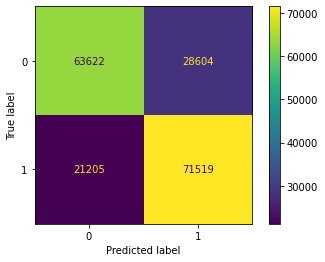

In [ ]:
#Models
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log = GridSearchCV(LogisticRegression(), param_grid = {'C': [0.01, 1, 10 ]})
log.fit(Xtrain, ytrain)
evaluation(Xtest, ytest, log)

              precision    recall  f1-score   support

           0       0.74      0.67      0.70     92226
           1       0.70      0.77      0.73     92724

    accuracy                           0.72    184950
   macro avg       0.72      0.72      0.72    184950
weighted avg       0.72      0.72      0.72    184950



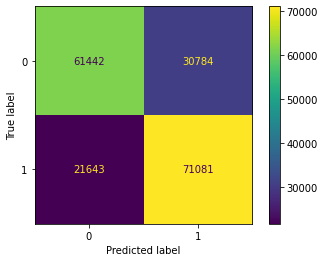

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GridSearchCV(GaussianNB(), param_grid = {'var_smoothing': [0.01, 1, 10 ]})
gnb.fit(Xtrain, ytrain)
evaluation(Xtest, ytest, gnb)

              precision    recall  f1-score   support

           0       0.84      0.73      0.78     92226
           1       0.76      0.86      0.81     92724

    accuracy                           0.79    184950
   macro avg       0.80      0.79      0.79    184950
weighted avg       0.80      0.79      0.79    184950



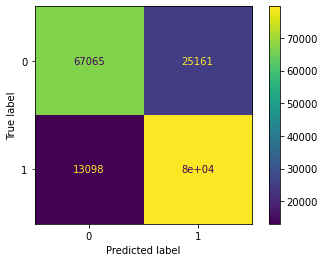

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dtc = GridSearchCV(DecisionTreeClassifier(), param_grid = {'max_depth': [x for x in range(5, 100, 5)]})
dtc.fit(Xtrain, ytrain)
evaluation(Xtest, ytest, dtc)

              precision    recall  f1-score   support

           0       0.84      0.73      0.78     92226
           1       0.76      0.86      0.81     92724

    accuracy                           0.79    184950
   macro avg       0.80      0.79      0.79    184950
weighted avg       0.80      0.79      0.79    184950



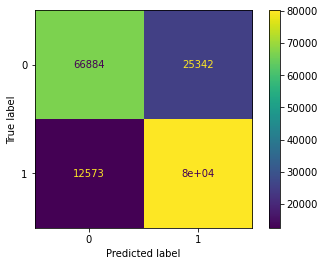

In [ ]:
#BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bag_dtmodel = GridSearchCV(BaggingClassifier(), param_grid = {'n_estimators': [100]})
bag_dtmodel.fit(Xtrain, ytrain)
evaluation(Xtest, ytest, bag_dtmodel)

              precision    recall  f1-score   support

           0       0.77      0.72      0.75     92226
           1       0.74      0.79      0.76     92724

    accuracy                           0.76    184950
   macro avg       0.76      0.76      0.76    184950
weighted avg       0.76      0.76      0.76    184950



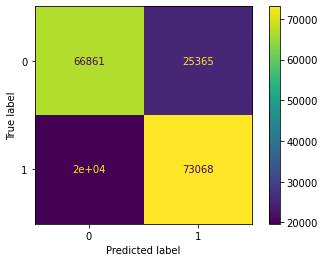

In [ ]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_dtmodel = GridSearchCV(AdaBoostClassifier(), param_grid = {'n_estimators': [100]})
ada_dtmodel.fit(Xtrain, ytrain)
evaluation(Xtest, ytest, ada_dtmodel)

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': [5, 10, 15, 20]})
knn.fit(Xtrain, ytrain)
evaluation(Xtest, ytest, knn)

NameError: ignored

In [ ]:
#SVM
from sklearn.svm import SVC

svm = GridSearchCV(SVC(), param_grid = {'C' : [0.01, 0.1, 1]})
svm.fit(Xtrain, ytrain)
evaluation(Xtest, ytest, svm)

In [ ]:
#neural nets
#Re-used code from HW6
import tensorflow as tf

model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(375503, 32)),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(10)
  ])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(Xtrain, ytrain, epochs=10)

test_loss, test_acc = model.evaluate(Xtest, ytest, verbose=2)

print('\nTest accuracy:', test_acc)